In [1]:
import random, matplotlib.pyplot as plt, numpy as np
import math
myFile = open("hw1a.txt",'r')
plt.rcParams['figure.figsize'] = [13, 10]
entries = myFile.readlines()
dsureness1 = []
dsureness2 = []
dsureness3 = []

In [2]:
def selectfirstk(entries, k):
    selection = []
    for i in range(k):
        selection += [float(entries[i])]
    return np.average(np.array(selection))

def selectfromapoint(entries,m,k):
    selection = []
    count = 0
    while(count < k):
        currentIndex = (m + count) % len(entries)
        selection += [float(entries[currentIndex])]
        count += 1
    return np.average(np.array(selection))

def selectrandomly(entries,k):
    selection = []
    alreadySelected = []
    count = 0
    while(count < k):
        randomno = random.randint(0,9999)
        if(randomno not in alreadySelected):
            selection += [float(entries[randomno])]
            count += 1
            alreadySelected += [randomno]
    return np.average(np.array(selection))

def degreeofsureness(calculatedmean, actualmean, calculatedstdev):
    return ((1/(((2*(math.pi))**0.5)*(calculatedstdev)))*(math.e**-((((calculatedmean-actualmean)/calculatedstdev)**2)*0.5)))
    

In [3]:
#for total average
y = [float(i) for i in entries]
x = np.array(y)
myavg = np.average(x)
mystd = np.std(x)
print("The actual average of data is:",myavg)
print("The actual stdev of data is:",mystd)

The actual average of data is: 120.13317118090191
The actual stdev of data is: 19.975538382855223


The Three Plots for K = 10
Degree of sureness by method 1: 0.0
Degree of sureness by method 2: 0.07733903207236419
Degree of sureness by method 3: 0.056184038051584936


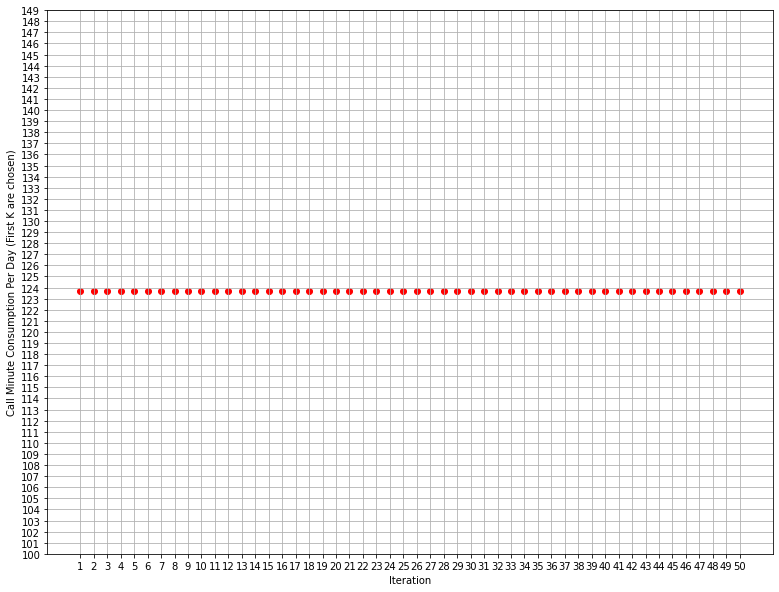

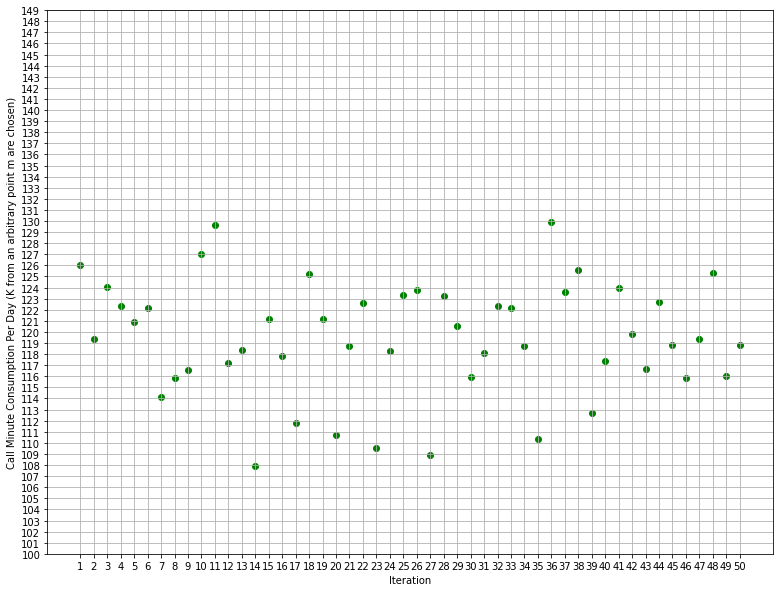

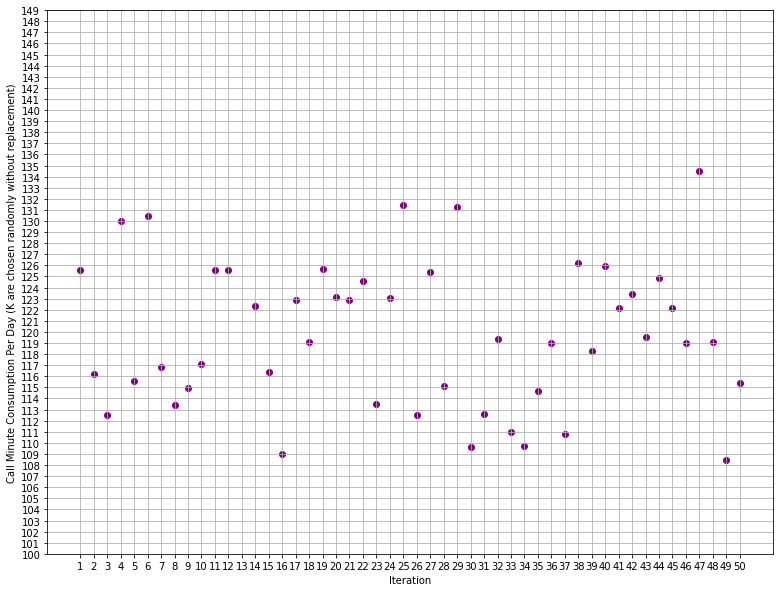

The Three Plots for K = 20
Degree of sureness by method 1: 0.0
Degree of sureness by method 2: 0.08769543388335115
Degree of sureness by method 3: 0.10092226573722946


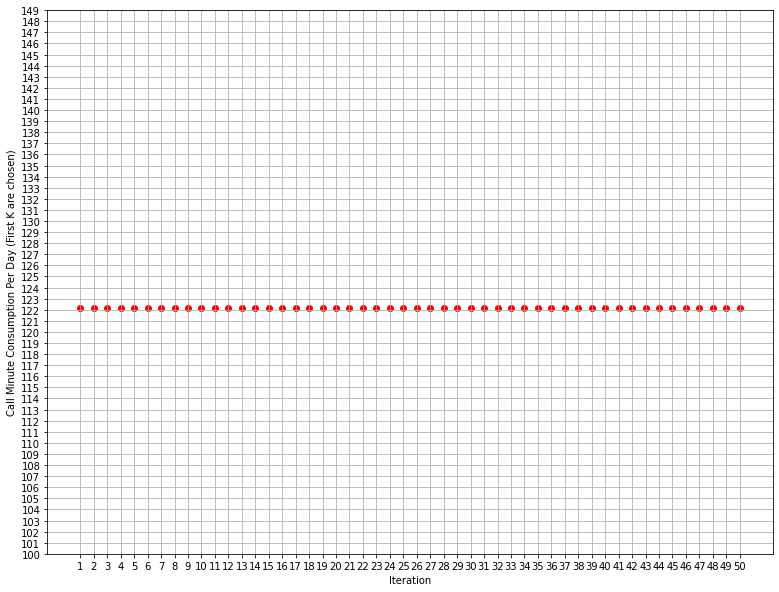

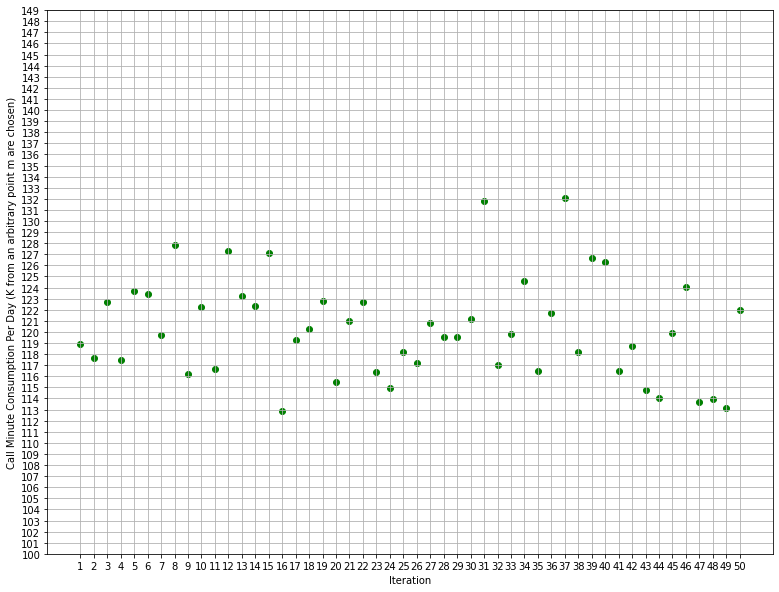

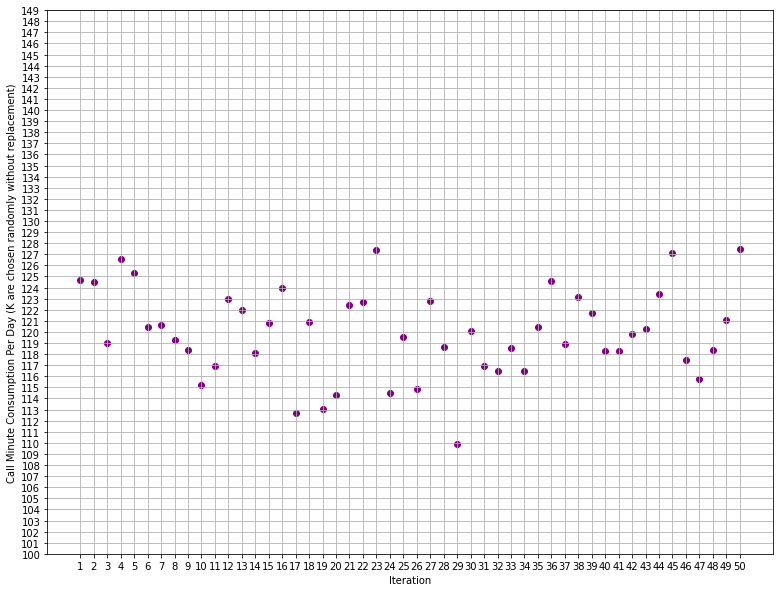

The Three Plots for K = 50
Degree of sureness by method 1: 0.0
Degree of sureness by method 2: 0.149631344868736
Degree of sureness by method 3: 0.13753278331596633


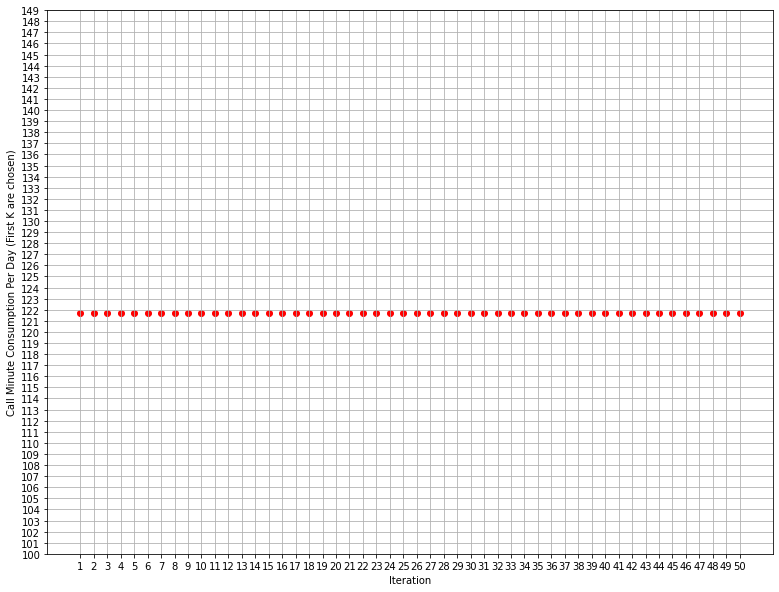

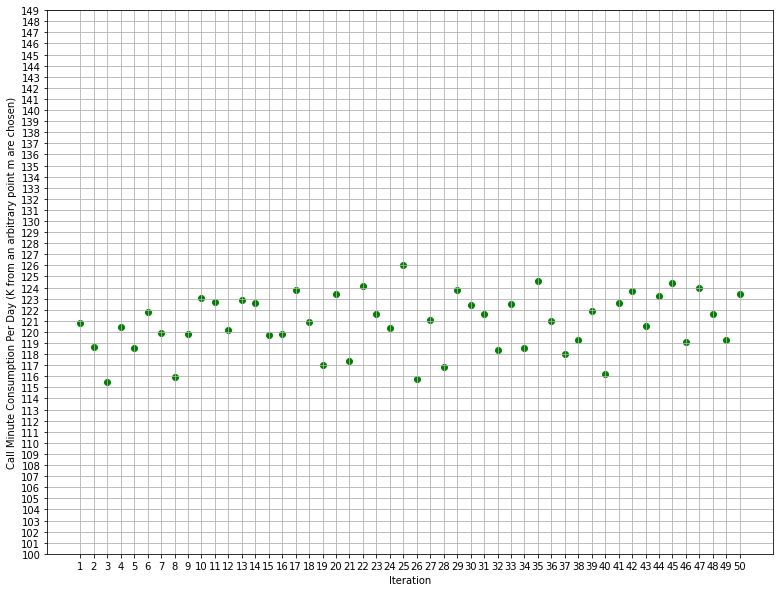

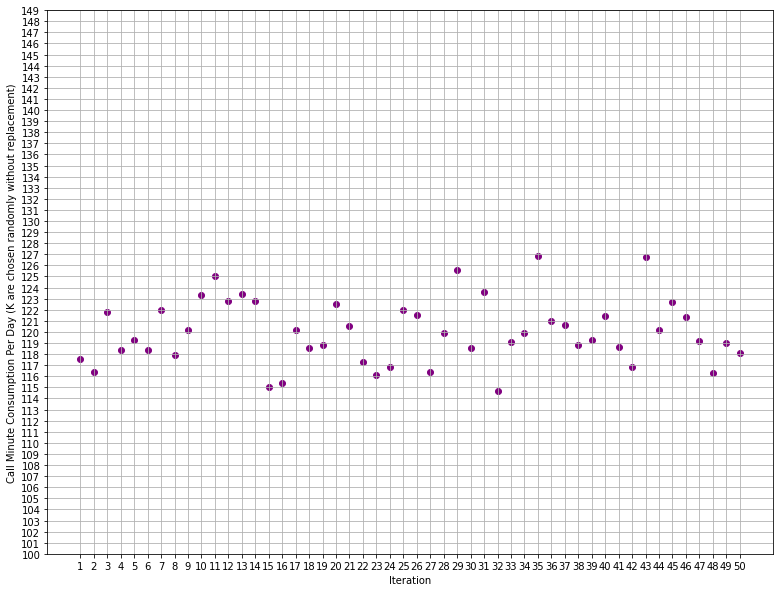

The Three Plots for K = 100
Degree of sureness by method 1: 0.0
Degree of sureness by method 2: 0.2108043154071715
Degree of sureness by method 3: 0.19766231255739478


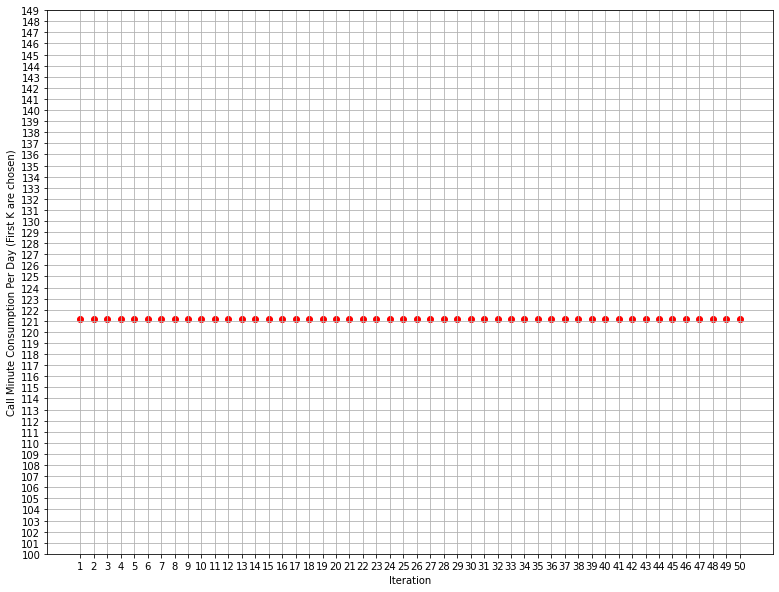

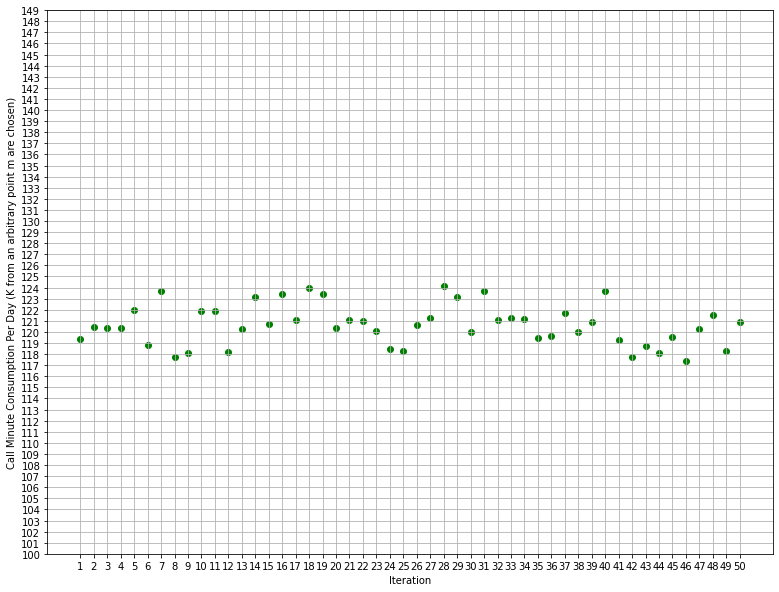

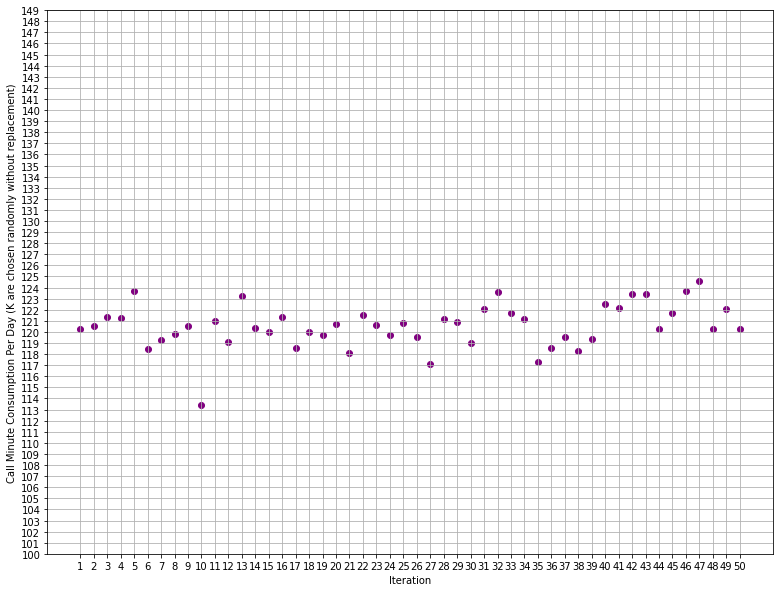

The Three Plots for K = 200
Degree of sureness by method 1: 0.0
Degree of sureness by method 2: 0.3119703813723184
Degree of sureness by method 3: 0.26830989470136424


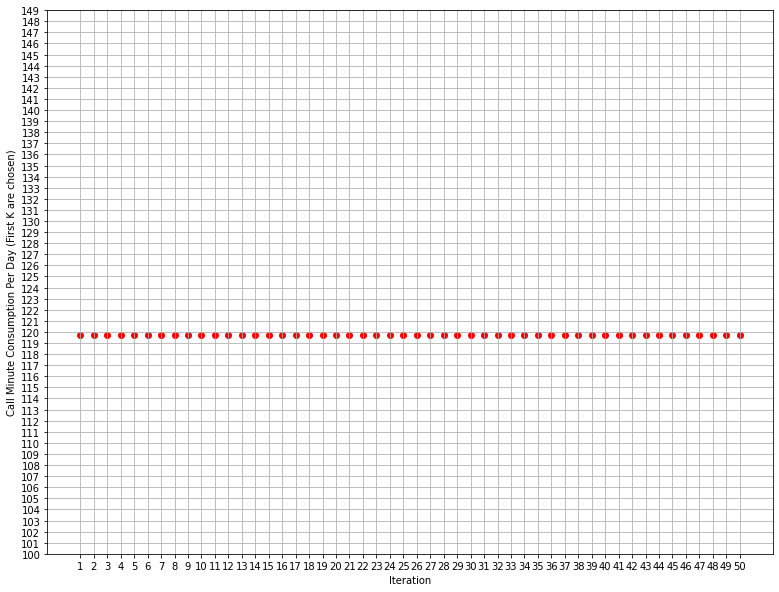

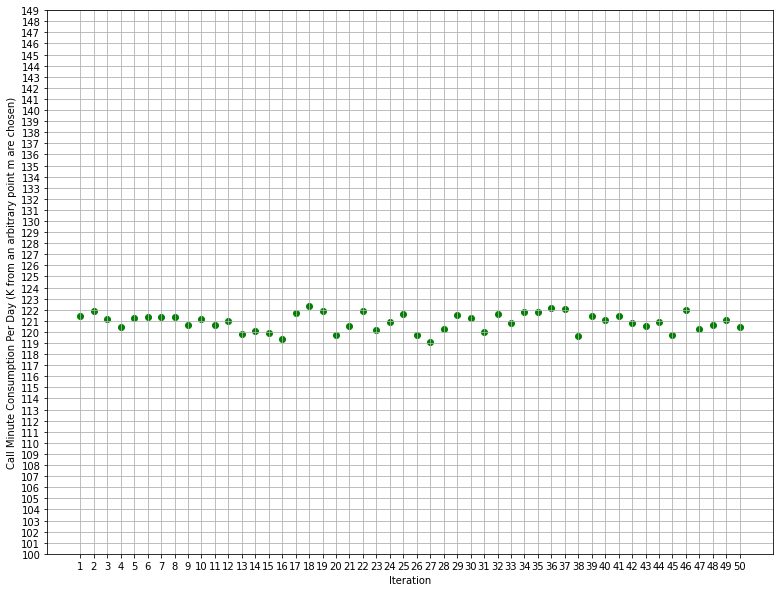

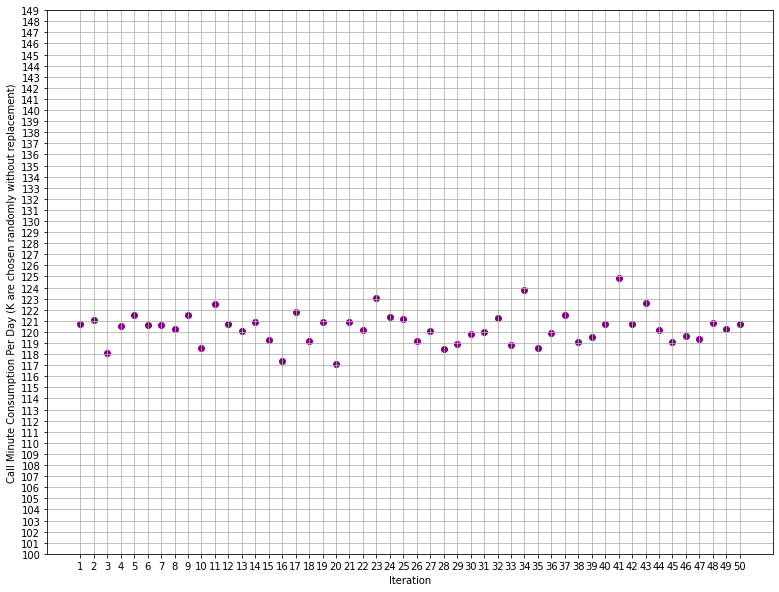

In [4]:
threshold = 0.000001
for k in [10,20,50,100,200]:
    selectfirstk_averages = []
    selectfromapoint_averages = []
    selectrandomly_averages = []
    for i in range(50):
        selectfirstk_averages += [selectfirstk(entries,k)]
    for i in range(50):
        m = random.randint(0,999)
        selectfromapoint_averages += [selectfromapoint(entries,m,k)]
    for i in range(50):
        selectrandomly_averages += [selectrandomly(entries,k)]
    
    print("The Three Plots for K = "+str(k))
    m1 = np.average(np.array(selectfirstk_averages))
    m2 = np.average(np.array(selectfromapoint_averages))
    m3 = np.average(np.array(selectrandomly_averages))
    std1 = np.std(np.array(selectfirstk_averages))
    std2 = np.std(np.array(selectfromapoint_averages))
    std3 = np.std(np.array(selectrandomly_averages))
    d1 = degreeofsureness(m1,myavg,std1+threshold)
    d2 = degreeofsureness(m2,myavg,std2)
    d3 = degreeofsureness(m3,myavg,std3)
    print("Degree of sureness by method 1:", d1)
    print("Degree of sureness by method 2:", d2)
    print("Degree of sureness by method 3:", d3)
    dsureness1 += [d1]
    dsureness2 += [d2]
    dsureness3 += [d3]
    plt.grid()
    plt.scatter(range(1,51), selectfirstk_averages, color="red")
    plt.xlabel("Iteration")
    plt.ylabel("Call Minute Consumption Per Day (First K are chosen)")
    plt.ylim(100,140)
    plt.yticks(np.arange(100,150,1))
    plt.xticks(range(1,51))
    plt.show()
    plt.grid()
    plt.scatter(range(1,51), selectfromapoint_averages, color="green")
    plt.ylim(100,140)
    plt.yticks(np.arange(100,150,1))
    plt.xticks(range(1,51))
    plt.xlabel("Iteration")
    plt.ylabel("Call Minute Consumption Per Day (K from an arbitrary point m are chosen)")
    plt.show()
    plt.grid()
    plt.scatter(range(1,51), selectrandomly_averages, color="purple")
    plt.ylim(100,140)
    plt.yticks(np.arange(100,150,1))
    plt.xticks(range(1,51))
    plt.xlabel("Iteration")
    plt.ylabel("Call Minute Consumption Per Day (K are chosen randomly without replacement)")
    plt.show()

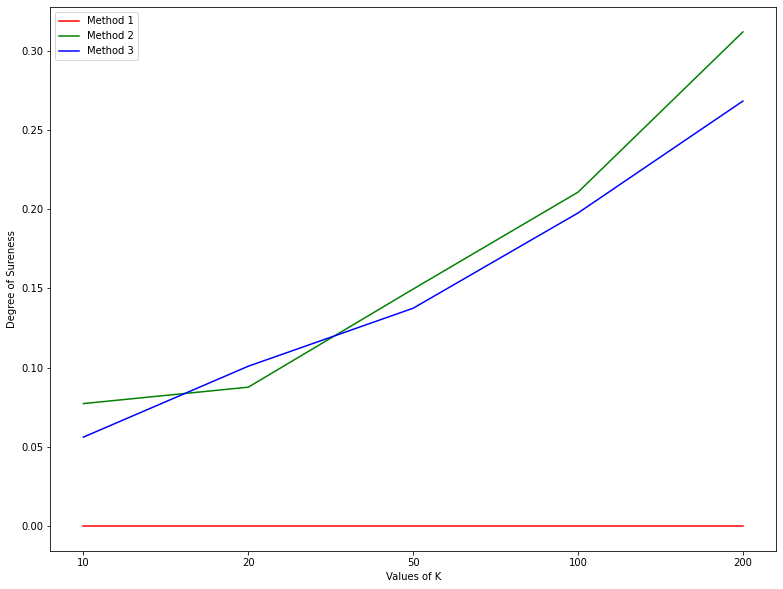

In [5]:
plt.plot(["10","20","50","100","200"],dsureness1,'r')
plt.plot(["10","20","50","100","200"],dsureness2,'g')
plt.plot(["10","20","50","100","200"],dsureness3,'b')
plt.legend(["Method 1","Method 2","Method 3"])
plt.xlabel("Values of K")
plt.ylabel("Degree of Sureness")
plt.show()

In [6]:
#K = 200, Method 2
k = 200
m = random.randint(0,999)
selection = []
count = 0
while(count < k):
    currentIndex = (m + count) % len(entries)
    selection += [float(entries[currentIndex])]
    count += 1
print(np.average(np.array(selection)))
print(np.std(np.array(selection)))

120.6360888613122
17.18783283655349
